In [22]:
#Imports necessários
import numpy as np
import math

In [24]:
#Funções utilizadas
def f1(x):
    return x[0]**2 + x[1]**2 -25
def f2(x):
    return x[0]**2 - x[1] **2 -7

In [23]:
#Funções utilizadas pelo professor para conferir caso necessário
# def f1(x):
#     return x[0] + x[1] - 3
# def f2(x):
#     return x[0]**2 + x[1]**2 - 9

In [25]:
def F(x):
    N = len(x)
    b = [0]*N
    b[0] = f1(x)
    b[1] = f2(x)
    return b

In [26]:
#Implementação derivadas parciais de 2 variáveis
def derivadas_parciais(f, x, h=1e-6):
    df_dx = (f([x[0] + h, x[1]]) - f([x[0] - h, x[1]])) / (2 * h)
    df_dy = (f([x[0], x[1] + h]) - f([x[0], x[1] - h])) / (2 * h)
    return df_dx, df_dy

In [27]:
#Implementação Jacobiana
def J(x):
    A = [[0,0],[0,0]]
    A[0][0], A[0][1] = derivadas_parciais(f1, x)
    A[1][0], A[1][1] = derivadas_parciais(f2, x)
    return A

In [28]:
#Fatoração LU
def fatoracao_lu(A, b):
    def subs_sucessivas(A, b):
        n = len(A)
        x = n * [0]
        for i in range(0, n):
            s = 0
            for j in range(0, i):
                s = s + A[i][j] * x[j]
            x[i] = (b[i]-s)/A[i][i]
        return x

    def identidade(n):
        m = []
        for i in range(0, n):
            linha = [0] * n
            linha[i] = 1
            m.append(linha)
        return m

    def subs_retroativas(A, b):
        n = len(A)
        x = n * [0]
        for i in range(n-1, -1, -1):
            s = 0
            for j in range(i+1, n):
                s = s + A[i][j] * x[j]
            x[i] = (b[i] - s)/ A[i][i]
        return x

    n = len(A)

    L = identidade(n)

    for k in range(0, n -1):
        for i in range(k+1, n):
            m = -A[i][k]/A[k][k]
            L[i][k] = -m
            for j in range(k+1, n):
                A[i][j] = m * A[k][j] + A[i][j]
            A[i][k] = 0

    U = A

    y = subs_sucessivas(L, b)
    x = subs_retroativas(U, y)
    
    return x

In [29]:
# Função para gerar uma lista negativa
def lista_negativa(lista):
    lista = [-1 * x for x in lista]
    return lista

In [30]:
# Função parar norma do vetor
def norm(x):
    return max(abs(xi) for xi in x)

In [31]:
# Dados inicias
# x0 = [1,5] #valor utilizado pelo professor para conferir caso necessário
x0 =[3,4]
xv = []
xv.append(np.array(x0)) #Lista criada para gerar o gráfico das duas funções
maxiteracoes =30
iteracao = 0
epsilon = 0.01
divergencia = 10**20
print("Iteração", iteracao,":",x0)

Iteração 0 : [3, 4]


In [32]:
# Realização do método de newton
while (iteracao < maxiteracoes):
    A = np.array(J(x0))
    b = np.array(F(x0))
    b_ = lista_negativa(b)
    s = np.array(fatoracao_lu(A, b_))
    omega=0.1
    x1 = np.array(x0) + s # Sem utilizar a sobrerrelaxação
    xv.append(x1)
    iteracao+=1
    print("Iteração", iteracao,":",x1)
    if (norm(s)<epsilon or norm(b)<epsilon):
        print("Convergiu")
        print("Precisão:",norm(s))
        break
    if (norm(b)>divergencia):
        print("Divergiu")
        break

    x0=x1

Iteração 1 : [4.16666667 3.125     ]
Iteração 2 : [4.00333333 3.0025    ]
Iteração 3 : [4.00000139 3.00000104]
Convergiu
Precisão: 0.003331945648346087


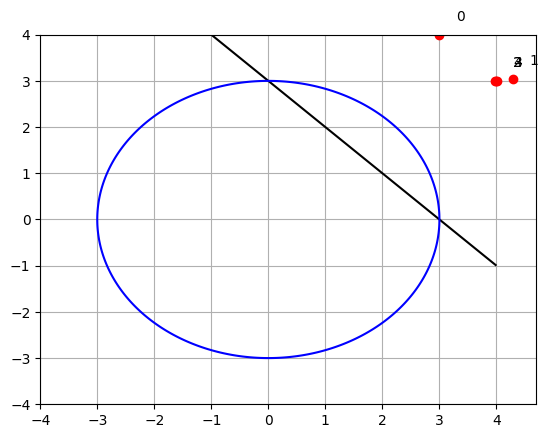

In [21]:
#Construção do gráfico das duas funções.

import matplotlib.pyplot as plt
x = np.linspace(-4, 4, 400)
y = np.linspace(-4, 4, 400)
x, y = np.meshgrid(x, y)

a = 1.0
b = 1.0
plt.contour(x, y,(x + y - 3), [0], colors='k')
a = 1.
b = 3.
plt.contour(x, y,(x**2 + y**2 - 9), [0], colors='b')

cont = 0
for e in xv:
    plt.plot(e[0],e[1],'or')
    name = cont
    plt.text(e[0]+0.3, e[1]+0.3, name, fontsize=10)
    cont = cont + 1

plt.grid()
plt.show()